<h1><center>Regressão Linear Simples</center></h1>

<h2>Introdução</h2>

Esse é um exercício de regressão linear simples do curso <a href='https://www.udemy.com/the-data-science-course-complete-data-science-bootcamp/'>The Data Science Course 2019: The Complete Data Science Bootcamp</a>, onde nos é dado um dataset do mercado imobiliário e devemos criar a regressão linear do preço do imóvel utilizando seu tamanho.<br>
Aproveitando este exercício, vou utilizar estes dados para iniciar meu caderno de estudo no curso, que servirá para mim posteriormente como fonte de revisão.

<a name='INDICE'></a>
<h2>Índice</h2>
<ol>
    <li><a href='#REG_LIN'>Regressão Linear</a></li>
    <ol>
        <li><a href='#REG_LIN_SIM'>Regressão Linear Simples</a></li>
        <li><a href='#MET_MIN_QUA'>Método dos Mínimos Quadrados</a></li>
        <li><a href='#R_QUAD'>Coeficiente de Determinação (R²)</a></li>
    </ol>
    <li><a href='#EXERCICIO'>Exercício</a></li>
    <ol>
        <li><a href='#BIBLIOTECA'>Importando as bibliotecas</a></li>
        <li><a href='#EXPLORAR'>Explorando os dados</a></li>
        <li><a href='#REGRESSAO'>Criando a regressão</a></li>
        <li><a href='#ANALISE'>Analisando o modelo</a></li>
    </ol>
    <li><a href='#CONCLUSAO'>Conclusão</a></li>
</ol>

<a name='REG_LIN'></a>
<h2>Regressão Linear</h2>

É a aproximação linear de uma relação causal entre duas ou mais variáveis, se a relação é entre duas variáveis temos uma Regressão Linear Simples (RLS), que vamos utilizar neste exemplo, ou se temos uma relação entre três ou mais variáveis temos uma Regressão Linear Múltipla (RLM). É uma das formas mais comuns de fazer inferências e previsões.

<a name='REG_LIN_SIM'></a>
<h3>Regressão Linear Simples</h3>

A Regressão Linear Simples pode ser descrita como uma função de primeiro grau, expressa pela seguinte equação:<br>
<br>
\begin{align}
\ y & = \ a + bx_{1} \\
\end{align}
<br>
Onde descreve uma reta com os comportamentos dados das duas variáveis, a variável dependente <i>y</i> e a variável independente <i>x</i>. Já os parâmetros <i>a</i> e <i>b</i> são os coeficientes de regressão que representam o intercepto e a inclinação, e devem ser calculados, porém como calculamos os elementos <i>a</i> e <i>b</i>?<br>
Para isso temos o Método dos Mínimos Quadrados.

<a name='MET_MIN_QUA'></a>
<h3>Método dos Mínimos Quadrados</h3>

Método dos mínimos quadrados (MMQ) ou em inglês Ordinary Least Squares (OLS) visa diminuir a soma dos quadrados dos resíduos ou SSE (Sum Square Error) para aumentar a explicabilidade da regressão. Para compreender melhor esse termo é necessário conhecer mais outras duas somas dos quadrados:
<ul>
    <li><b>SSR (Sum Square Regression):</b> a Soma dos Quadrados da Regressão é a diferença entre os pontos e a média, e é a variação atribuída ao erro. Ou seja, quanto maior o SSR melhor o modelo poderá explicar os resultados.</li><br>
\begin{align}
\ SSR = \sum{( \hat{Y_{i}} - \bar{Y})^2}
\end{align}
    <br>
    <li><b>SSE (Sum Square Error):</b> a Soma dos Quadrados dos Resíduos é a diferença entre o valor previsto pela regressão e o valor real, a variabilidade não explicada pelo modelo.</li>
\begin{align}
\ SSE = \sum{( Y_{i} - \hat{Y_{i}})^2}
\end{align}
    <br>
    <li><b>SST (Sum Square Total):</b> a Soma Total dos Quadrados demonstra a variação total da variável dependente.</li><br>
\begin{align}
\ SST = \sum{( Y_{i} - \bar{Y})^2} \\ \\
\ SST = SSR + SSE
\end{align}
</ul>
<br>
<img src='./img/sst_ssr_sse.png' vspace='10px' hspace='10px'/>
<br>
Ok, agora que entendemos o funcionamento do método, como avaliamos o quanto a nossa regressão explica a relação das variáveis?<br>Para isso temos o coeficiente de determinação, ou mais conhecido como R Quadrado (R²).

<a name='R_QUAD'></a>
<h3>Coeficiente de Determinação (R²)</h3>

R Quadrado é uma medida que varia de 0 à 1, quanto mais perto de 1, melhor o modelo pode explicar os valores. E para calcular o coeficiente é necessário duas medidas que acabamos que ver, SSR e SST.<br>
\begin{align}
\ R^2 = 1 - \frac{SSR}{SST}
\end{align}
<br>
<a href='#INDICE'>Voltar para o índice</a><br>

<a name='EXERCICIO'></a>
<h2>Exercício</h2>

Após toda essa teoria, chegou a hora de colocarmos em prática. Para resolver esse exercício iremos utilizar a biblioteca StatsModel, então será necessário importar algumas bibliotecas.<br>

<a name='BIBLIOTECA'></a>
<h3>Importando as bibliotecas</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv('real_estate_price_size.csv')
df.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


Com as bibliotecas importadas e dataset carregado, vamos verificar se há algum dado faltante.

In [3]:
df.isnull().sum()

price    0
size     0
dtype: int64

Como não há nenhum dado faltante, podemos começar a explorar o nosso dataset.

<a name='EXPLORAR'></a>
<h3>Explorando os dados</h3>

Primeiro vamos utilizar do método <i>describe</i> para vermos a tendência central e a dispersão dos nossos dados.

In [4]:
df.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


Após isso vamos plotar um gráfico de dispersão entre as variáveis para facilitar ainda mais a nosso visualização.

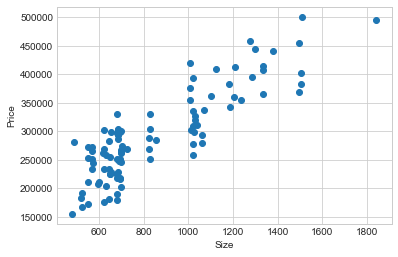

In [5]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6,4))
plt.scatter(x=df['size'], y=df['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

<a name='REGRESSAO'></a>
<h3>Criando a Regressão</h3>

Antes de criarmos a regressão precisamos separar qual é a nossa variável dependente e independente.

In [6]:
x = df['size']    #Variável Independente
y = df['price']   #Variável Dependente

Pronto, variáveis declaradas, porém o <i>StatsModels</i> necessita que adicionamos um constante para o X.

In [7]:
X = sm.add_constant(x)

Agora estamos pronto para criar a regressão.

In [8]:
reg = sm.OLS(y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 14 May 2019   Prob (F-statistic):           8.13e-31
Time:                        11:29:39   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Modelo criado, agora plotamos o mesmo gráfico de dispersão só que com a reta da regressão linear.

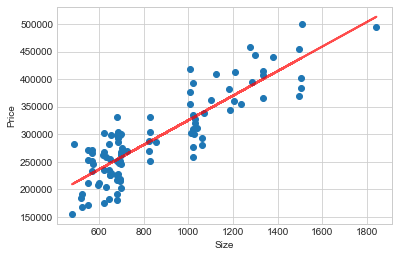

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(x,y)
reg_lin = x*223.1787+101900
plt.plot(x, reg_lin, c='red', lw=2, alpha=0.7)
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

<a name='ANALISE'></a>
<h3>Analisando o modelo</h3>

Modelo criado, porém como avaliamos se é um bom ou mau modelo? Para isso voltamos aplicamos a teoria para entendermos todas as medidas que o método <i>Summary</i> nos passa em 3 tabelas. A primeira tabela, nos traz uma série de informações sobre o modelo:

<img src='./img/summary_model.png' width="400" height="600"/>

Aqui podemos fazer um double check se a variável dependente foi inserida corretamente e o modelo. Já nas medidas, as mais importantes são <i>F-statistic</i> e <i>R-squared</i>, que nos diz que o nosso modelo pode explicar 74,5%.<br>
<img src='./img/summary_variable.png' width='400' height='600'/>

Já a segunda tabela foca mais nas variáveis e com ela é possível ver o coeficiente e a significância de cada variável, e nas seguinites colunas:
<ul>
    <li><b>coef:</b> como o nome já diz fornece os coeficientes <i>a</i> e <i>b</i> da equação da regressão linear;</li>
    <li><b>std err:</b> é o erro padrão e quanto menor melhor a acurácia da predição;</li>
    <li><b>P>|t|:</b> é um teste de hipótese das variáveis, onde a hipótese nula é se a variável é igual a zero, ou seja, se a variável é significante para o modelo ou não.</li>
</ul>

<a href='#INDICE'>Voltar para o índice</a>

<a name='CONCLUSAO'></a>
<h2>Conclusão</h2>

Essa foi a resolução do exercício de regressão linear, apesar de ser básico é uma forma simples e eficaz para fazer uma predição de algo utilizando apenas uma variável. É uma ferramenta poderosa e que pode ser calculada na mão que servirá de conhecimento para outros modelos.<br>
Resolvi acrescentar a teoria para que sirva como uma revisão e consulta no futuro.<br>

<a href='#INDICE'>Voltar para o índice</a>